https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/open-MODIS-hdf4-files-python/


In [2]:
# Import packages
import os
import re  # regular expressions
import warnings
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em

warnings.simplefilter('ignore')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'nyu', 'rbda_project_data'))


In [12]:
# Create a path to the pre-fire MODIS h4 data
precipitation_path = os.path.join("vegetation_indices_11_28",
                             "MOD13A2.A2019113.h08v05.006.2019129235845.hdf")


In [13]:
# View dataset metadata
with rio.open(precipitation_path) as dataset:
    print(dataset)
    hdf4_meta = dataset.meta

# Notice that there are metadata at the highest level of the file
hdf4_meta


<open DatasetReader name='vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf' mode='r'>


{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [14]:
# Print all of the subdatasets in the data
with rio.open(precipitation_path) as dataset:
    crs = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)


HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI
HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle
HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days composite day of the year
HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days pixel reliability
HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI
HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality
HDF4_EOS:EOS_GRID:vegetation_indices_11_28/MOD13A2.A2019113.h08v05.006.2019129235845.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days red reflectance
HDF4_EOS:EOS_GR

In [16]:
# Create list to append arrays (of all type of data)
precipitation_data = []
precipitation_names = []

# Open the precipitation HDF5 file 
with rio.open(precipitation_path) as dataset:
    
    # loop through each subdataset in HDF5 file
    for name in dataset.subdatasets:
        
        # Open the subdataset 
        with rio.open(name) as subdataset:
            modis_meta = subdataset.profile
            
            # Read data as a  2 dimensional array and append to list
            precipitation_data.append(subdataset.read(1))
            precipitation_names.append(name);
#             np.savetxt(str(name)[-10:-1] + ".csv", subdataset.read(1), delimiter=",")


precipitation_data_stacked = np.stack(precipitation_data)

In [17]:
precipitation_data_stacked

array([[[ -3000,  -3000,  -3000, ...,   2939,   2872,   3401],
        [ -3000,  -3000,  -3000, ...,   3547,   3502,   2666],
        [ -3000,  -3000,  -3000, ...,   3335,   2391,   2264],
        ...,
        [  2472,   2442,   2428, ...,   1564,   1744,   1721],
        [  2276,   2289,   2374, ...,   1795,   1917,   1702],
        [  2345,   2300,   2343, ...,   1714,   1911,   1918]],

       [[ -4000,  -4000,  -4000, ...,  12492,  12440,  12457],
        [ -4000,  -4000,  -4000, ...,  12555,  12563,  12570],
        [ -4000,  -4000,  -4000, ...,  12668,  12673,  12628],
        ...,
        [ -3123,  -3118,  -3119, ...,  12780,  13188,  13422],
        [ -3146,  -3147,  -3148, ...,  14115,  14224,  14125],
        [ -3175,  -3162,  -3163, ...,  15060,  14328,  15004]],

       [[    -1,     -1,     -1, ...,    117,    117,    117],
        [    -1,     -1,     -1, ...,    117,    117,    117],
        [    -1,     -1,     -1, ...,    117,    117,    117],
        ...,
        [   

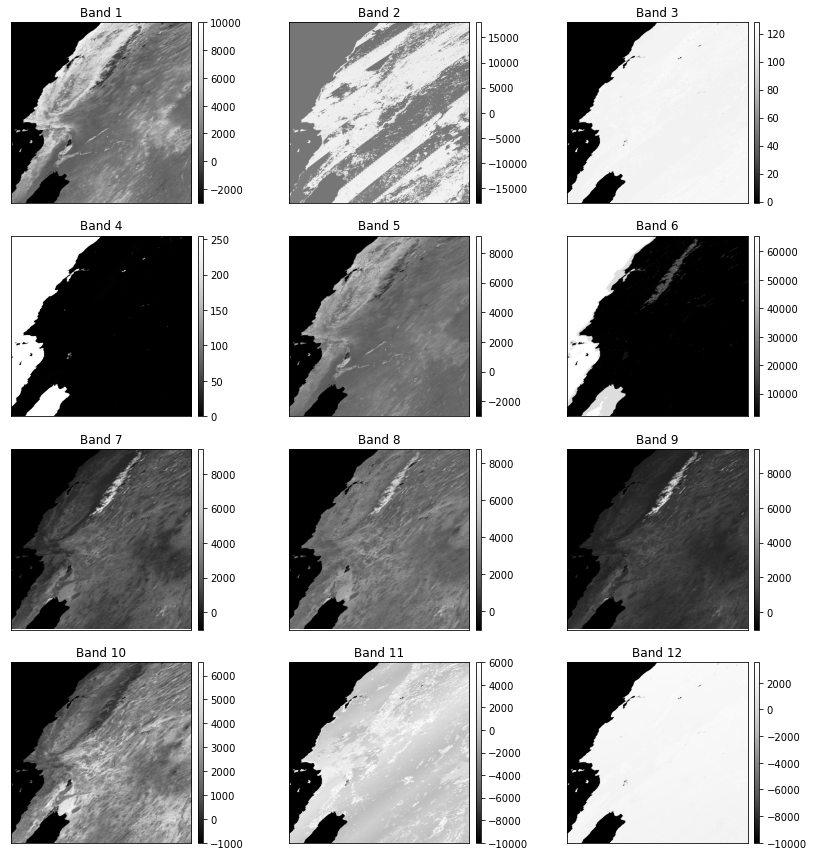

In [19]:
ep.plot_bands(precipitation_data_stacked,
              scale=False)
plt.show()

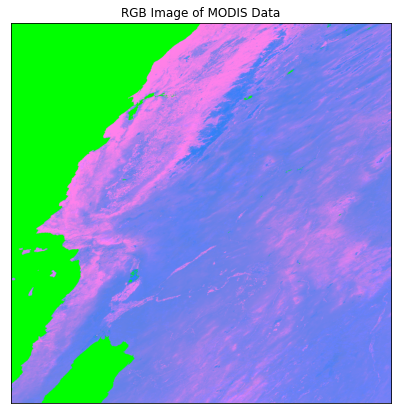

In [20]:
# Plot MODIS RGB
ep.plot_rgb(precipitation_data_stacked,
            rgb=[0, 3, 2],
            title='RGB Image of MODIS Data',
            stretch=True,
            figsize=(7, 7))

plt.show()


(1200, 1200)